# Test a Perceptual Phenomenon
#### Submission by Dylan Rose
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000




<font color='darkgreen'>1. "What is our independent variable? What is our dependent variable?"</font>

>In a Stroop task, our __independent variable__ is the congruence of the words. Our __dependent variable__ is the time it takes to name the ink colors.

<font color='darkgreen'>2. "What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices."</font>

>We can either have a __null hypothesis__ ($H_0$) or an __alternative hypothesis__ ($H_a$).

>__Null hypothesis__:  The sample mean is found outside of the critical region. In other words, we do not find a significant difference between the current population parameters and the population parameters after performing an intervention. 

$$ \mu = \mu_I$$

>_In our circumstance, the __null hypothesis__ would be that the congruence of the words does not affect the time taken to name the ink colors._

>__Alternative hypothesis__: The sample mean is found inside of the critical region. In other words, we find a significant difference between the current population parameters and the population paramters after performing an intervention.

$$\mu < \mu_I$$
$$\mu > \mu_I$$
__<center>or</center>__
$$\mu \ne \mu_I$$

>_In our circumstance, the __alternative hypothesis__ would be that congruent colors take either less time to identify  or more time to identify than incongruent colors._



> Since we are not testing against a known value and our samples have not been chosen independently, we can rule out the use of a one-sample t-test and a two-sample t-test. 

> I will be using the __paired t-test__, as the data is structured such that we can compare the difference in time taken between congruent and incongruent sets for the same individuals - we can test a change in a single population. Namely, we are testing whether the experimental intervention of _changing the congruence of the colors of names_ affects the time taken to identify the color being named. 

> The following assumptions will be made about the data in order justify the use of the paired t-test:
> 1. Each subject has independently performed the incongruent and congruent tests.
> 2. Each subject has taken both of the tests, and our paired measurements are each taken from a single subject.
> 3. The sampling distribution of the difference between the means is normally distributed. 

<font color='darkgreen'>3. "Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability."</font>
>The mean for the congruent set is ~14.05 seconds. The mean ($\bar x$) for the incongruent set is ~22.02 seconds. The median $(Md)$ for the congruent set is ~14.36 seconds, while the median of the incongruent set is ~21.02 seconds.
>*The five-number summary for each would be:*

| $f(x)$ | Congruent | Incongruent |
| --- | --- | --- |
| $min$ | ~8.63 | ~15.69 | 
| $Q1$ | ~11.90 | ~18.72 |
| $Q2 (Md)$ | ~14.36 | ~21.02 |
| $Q3$ | ~16.20 | ~24.05 |
| $max$ | ~22.33 | ~35.26 |

>with the range of each set being ~13.70 seconds *(congruent)* and ~19.57 seconds *incongruent*, and the standard deviation being ~3.56 *(congruent)* and ~4.80 *(incongruent)*.

<font color='darkgreen'>4. "Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots."</font>


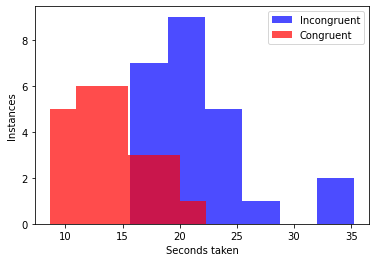

In [2]:
fig,ax=plt.subplots()
ax.set_xlabel("Seconds taken")
ax.set_ylabel("Instances")

plt.hist(df['Incongruent'], bins = 6, alpha=0.7, color="blue", label='Incongruent')
plt.hist(df['Congruent'], bins = 6, alpha=0.7, color="red", label='Congruent')
plt.legend()
plt.show()


In this histogram, we can see:
* The majority of subjects took less than 15 seconds to finish the congruent set.
* Nobody finished the incongruent set in under 15 seconds. 
* A handful of the worst-performing subjects took longer to complete the congruent set than the top-performing subjects in the incongruent set. 
* At least one subject took as long to identify the congruent set as the mode of the incongruent set.

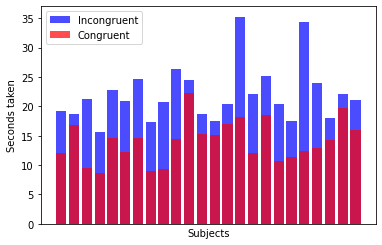

In [3]:
fig,ax=plt.subplots()
ax.set_xlabel("Seconds taken")
ax.set_ylabel("Instances")

plt.bar(range(len(df['Incongruent'])),df['Incongruent'], alpha = 0.7, color='blue', label='Incongruent')
plt.bar(range(len(df['Congruent'])),df['Congruent'], alpha = 0.7, color='red', label='Congruent')
ax.set_xlabel('Subjects')
ax.set_ylabel('Seconds taken')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.legend()
plt.show()

Here, we can see:
* Every subject performed better on the congruent set than on the incongruent set.
* The degree of improvement between sets is not universal. Some subjects performed only marginally better on the congruent set, while others completed the set in as little as half the time.

<font color='darkgreen'>5. "Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?" </font>

__Confidence Level:__ $\alpha = 0.05$ 

In [4]:

#Calculate mean difference
difference_df = df['Incongruent'] - df['Congruent']
mean_difference = np.mean(difference_df)
print('Average difference:' + str(mean_difference))

std = np.std(difference_df,ddof=1)
print('Standard deviation: ' + str(std))

#calculate standard error
standard_error = std / (14 ** 0.5)
print('Standard Error: ' + str(standard_error))

#calculate test statistic
test_statistic = mean_difference / standard_error
print('Test Statistic: ' + str(test_statistic))


Average difference:7.964791666666664
Standard deviation: 4.864826910359054
Standard Error: 1.3001796817515432
Test Statistic: 6.12591611640697



***
__Test Statistic:__ $t \approx 6.258$




$$\overline{x_d} \approx 7.965$$

$$SE = \frac{s_d}{\sqrt{n}} = \frac{4.864}{14} \approx 1.300$$

$$t = \frac{\overline{x_d}}{SE} \approx \frac{7.965}{1.273} \approx 6.126$$
***
$$d_f = n - 1 = 14 - 1 = 13$$

__Critical Value__: $t_{0.05,13} = 2.160369$* 

>*calculated for two-tailed test with https://goodcalculators.com/student-t-value-calculator/
***

__In summation:__

>$ \alpha = 0.05$

>$ \overline{x_d} = 7.965$

>$ SE = 1.300 $

>$ t = 6.126$

>$d_f = 13$

>$t_{0.05,13} = 2.160369$ 

***

Because $6.126 > 2.160369$, we can reject the null hypothesis.


In addition, the __p-value__* is less than 0.001, so we can say that the difference is extremely statistically significant.
> *calculated with https://www.graphpad.com/quickcalcs/pValue2/ 



__Conclusion:__ Because our t-value is greater than our critical value and is positive, we can say there is a positive correlation between the congruence of the words and the time it takes to correctly name the colors. In other words, it seems to take longer to identify the color of words when the word itself is incongruent with the color it is drawn in.

The results of the experiment did, in fact, match match my expectations. It was an intuitive assumption that there would be a conflict between the color of the words and what they said for the congruent set. Because the colors are harder to identify with the conflicting information, I would assume they would take longer.